# <font color="brown" align="center"><b> Customer Churn Analysis for a Subscription-Based Business</b></font>

## <font color="green"><b> Objective
Analyze customer churn patterns in a subscription-based business to gain insights into factors influencing churn, customer behavior, and business growth.

## <font color="green"><b> Tools & Techniques
- **SQL**: Data cleaning, filtering, aggregation, and exploratory queries.
- **Python (Pandas, Matplotlib, Seaborn)**: Data wrangling, visualization, and insights generation.

# <font color="green"><b> Project Architechure
1. Data Collection & Cleaning
2. Exploratory Data Analysis (EDA)
3. Customer Behavior Analysis
4. Visualizations & Insights
5. Business Recommendations

In [5]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load dataset
data = pd.read_csv("telco_churn.csv")
# Display first few rows
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


### Dataset
Telco Customer Churn dataset:
- **Customer details**: ID, demographics, tenure
- **Subscription details**: Plan type, monthly charges, contract type
- **Usage patterns**: Billing, support requests
- **Churn status**: Whether the customer left or not

## <font color="brown"><b> 1. Data Collection & Cleaning
- Load the dataset into SQL or Pandas.
- Handle missing values, duplicates, and inconsistencies.

In [9]:
# Data Cleaning
# Handling missing values
data.dropna(inplace=True)

In [10]:
# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# <font color="green"><b> SQL

In [13]:
# Create SQLite database and load data
conn = sqlite3.connect("customer_churn.db")
data.to_sql("customers", conn, if_exists="replace", index=False)

4121

In [14]:
# SQL Query - Get churn rate
query = """
SELECT Churn, COUNT(*) as Count 
FROM customers 
GROUP BY Churn
"""
print(pd.read_sql(query, conn))

   Churn  Count
0  False   1402
1     No   1487
2   True    676
3    Yes    556


In [15]:
# SQL Query - Average monthly charges by contract type
query = """
SELECT Contract, AVG(MonthlyCharges) as Avg_Monthly_Charges 
FROM customers 
GROUP BY Contract
"""
print(pd.read_sql(query, conn))

# Close database connection
conn.close()

         Contract  Avg_Monthly_Charges
0  Month-to-month            72.918249
1        One year            75.732429
2        Two year            72.951401


## <font color="brown"><b> 2. Exploratory Data Analysis (EDA)
- Analyze customer demographics and subscription details.
- Identify high-risk customer segments.
- Compare churned vs. non-churned customers.

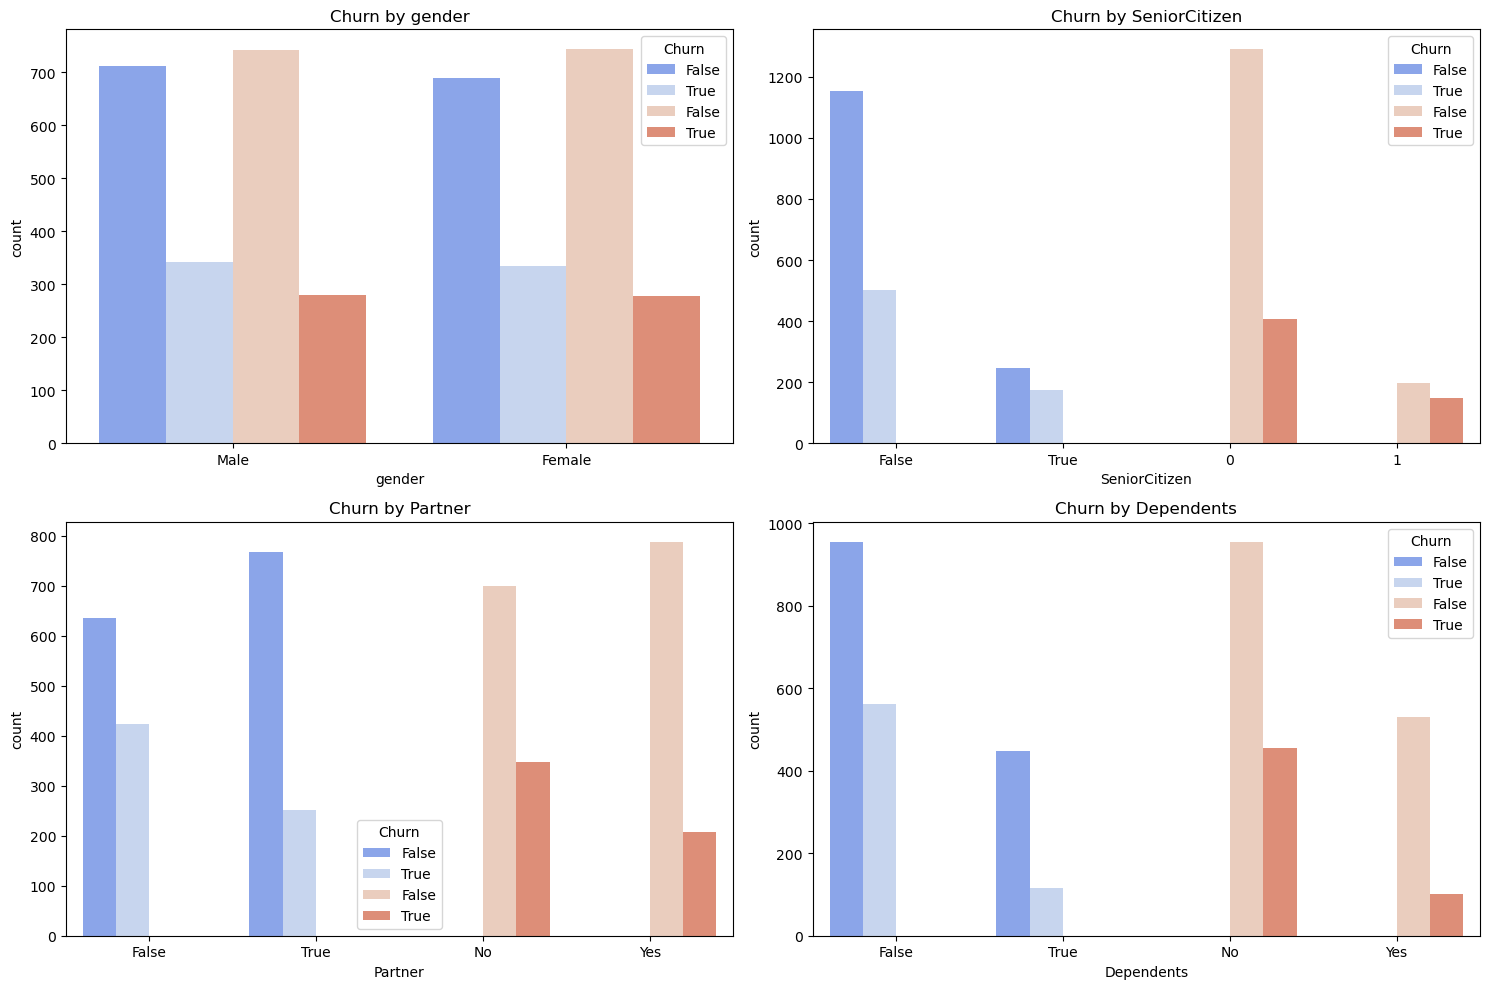

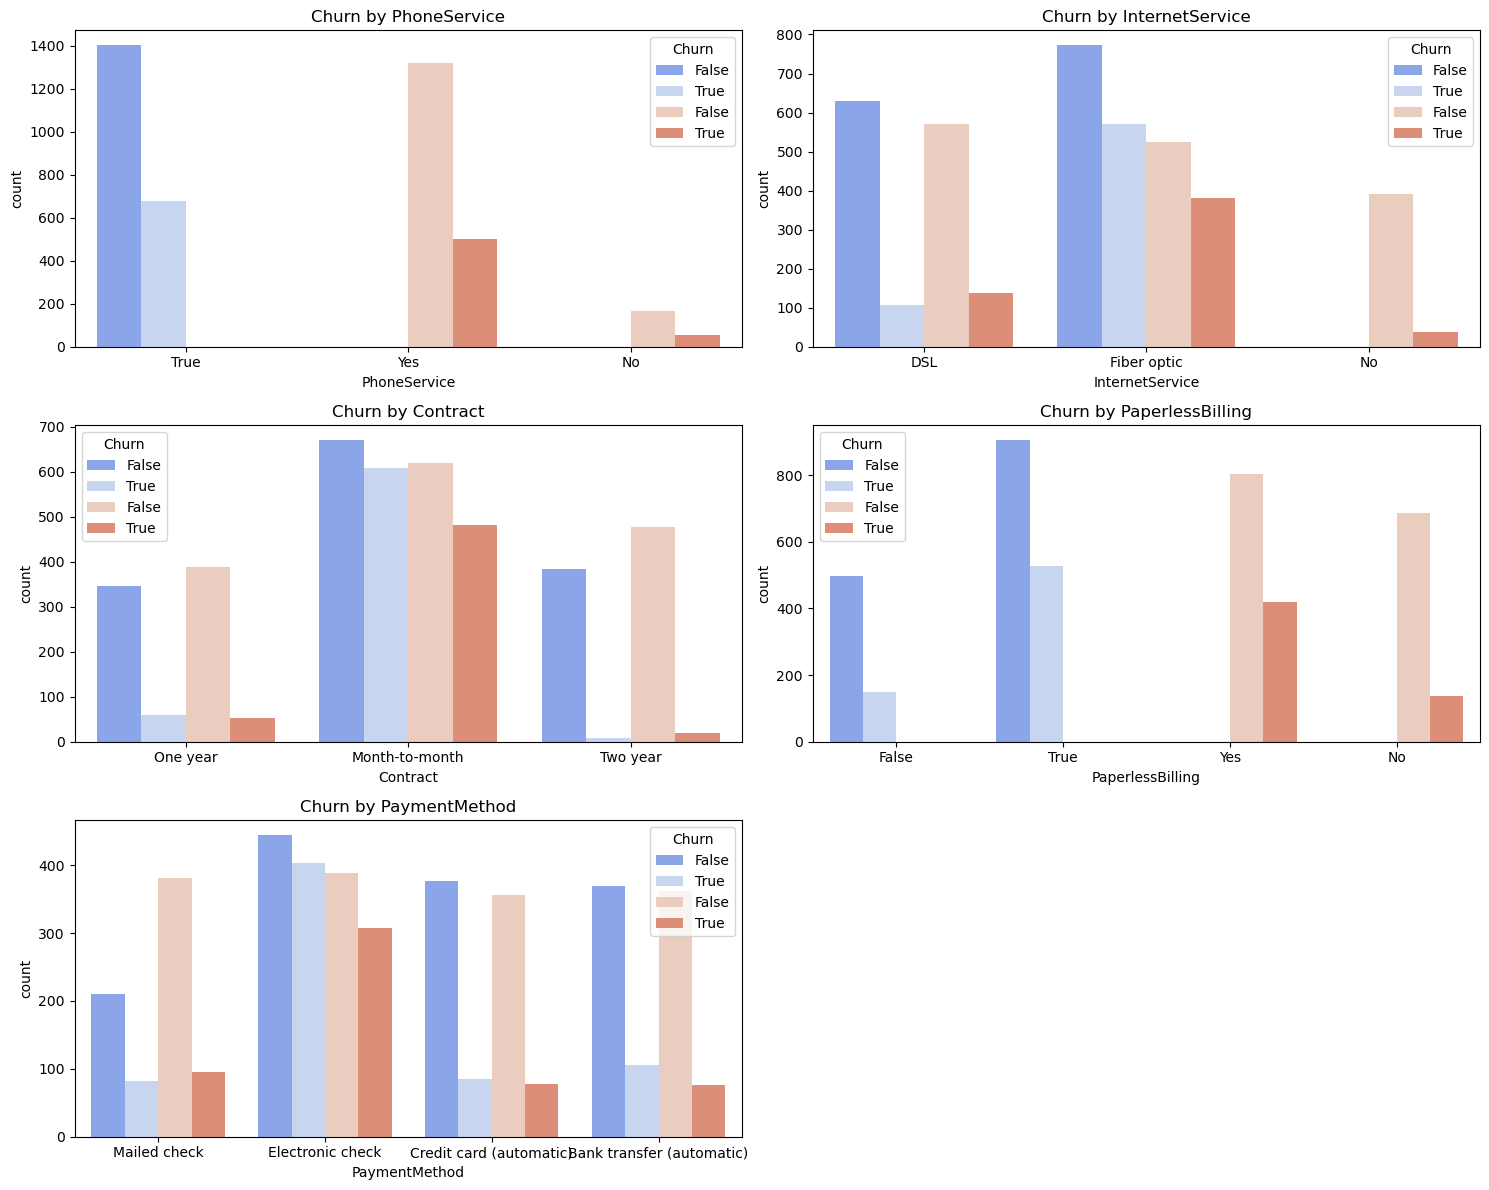

In [17]:
# Clean churn values for consistency
data['Churn'] = data['Churn'].replace({'Yes': True, 'No': False})

# Analyze customer demographics and subscription details
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
subscription_columns = ['PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plot demographics analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(demographic_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=col, hue='Churn', palette='coolwarm')
    plt.title(f"Churn by {col}")
plt.tight_layout()
plt.show()

# Plot subscription details analysis
plt.figure(figsize=(15, 12))
for i, col in enumerate(subscription_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data, x=col, hue='Churn', palette='coolwarm')
    plt.title(f"Churn by {col}")
plt.tight_layout()
plt.show()

### <font color="Blue"><b> Conclusion: 
**1. Customer Demographics Analysis**
- **Gender:** Churn rates are similar for male and female customers.  
- **Senior Citizens:** Senior citizens show higher churn rates compared to younger customers.  
- **Partner and Dependents:** Customers without partners or dependents have a higher tendency to churn.  

**2. Subscription Details Analysis**
- **Contract Types:** Month-to-Month contracts have the highest churn rates.  
- **Paperless Billing:** Customers with paperless billing are more likely to churn.  
- **Payment Method:** Electronic check payment methods are associated with higher churn compared to other payment methods.

In [19]:
# Identify high-risk customer segments based on churn rates
high_risk_segments = data[data['Churn'] == True].groupby('Contract').size() / data.groupby('Contract').size() * 100
print(high_risk_segments)
high_risk_segments = high_risk_segments.dropna()

Contract
Month-to-month    20.285594
One year           6.250000
Two year           2.242152
dtype: float64


#### <font color="Blue"><b> Conclusion: High-Risk Customer Segments
- Customers on **Month-to-Month contracts** are at the highest risk of churn.

In [21]:
# Compare churned vs. non-churned customers for key metrics
churn_comparison = data.groupby('Churn')[['tenure', 'MonthlyCharges']].mean()
print("Churn Comparison (Tenure and Monthly Charges):")
print(churn_comparison)

Churn Comparison (Tenure and Monthly Charges):
          tenure  MonthlyCharges
Churn                           
False  37.915938       61.263215
True   18.562950       73.937680
False  39.805278       81.685414
True   18.909763       83.108580


#### <font color="Blue"><b> Conclusion: Churned vs. Non-Churned Comparison
- **Tenure:** Churned customers have an average tenure of **18 months**, while retained customers have an average tenure of **37 months**.  
- **Monthly Charges:** Churned customers pay higher monthly charges, averaging around **$73.94**, compared to **$61.26** for retained customers.

## <font color="brown"><b> 3. Customer Behavior Analysis
- Analyze monthly charges and tenure patterns.
- Identify trends in contract types affecting churn.
- Compare churn rates across different customer segments.

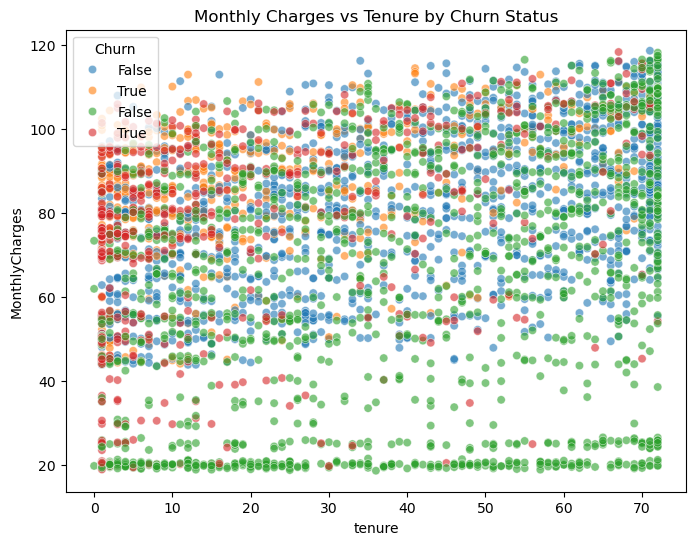

In [24]:
# Plot Monthly Charges vs Tenure to analyze behavior patterns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data, alpha=0.6)
plt.title("Monthly Charges vs Tenure by Churn Status")
plt.show()

### <font color="Blue"><b> Conclusion: Monthly Charges and Tenure Patterns
- Customers with **higher monthly charges and shorter tenures** are more likely to churn.
- Retained customers tend to have moderate monthly charges and longer tenures, indicating that loyalty builds over time with reasonable pricing.

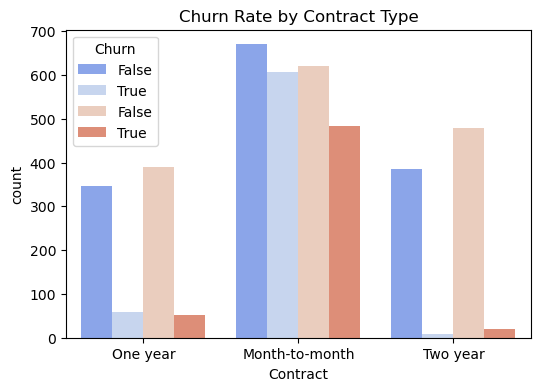

In [26]:
# Churn by Contract Type
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=data, palette='coolwarm')
plt.title("Churn Rate by Contract Type")
plt.show()

### <font color="Blue"><b> Conclusion: Contract Types Affecting Churn
- **Month-to-Month contracts** exhibit the highest churn rates, highlighting a strong link between the lack of long-term commitment and churn.  
- **One-Year and Two-Year contracts** show significantly lower churn rates, suggesting the effectiveness of longer-term agreements in retaining customers.

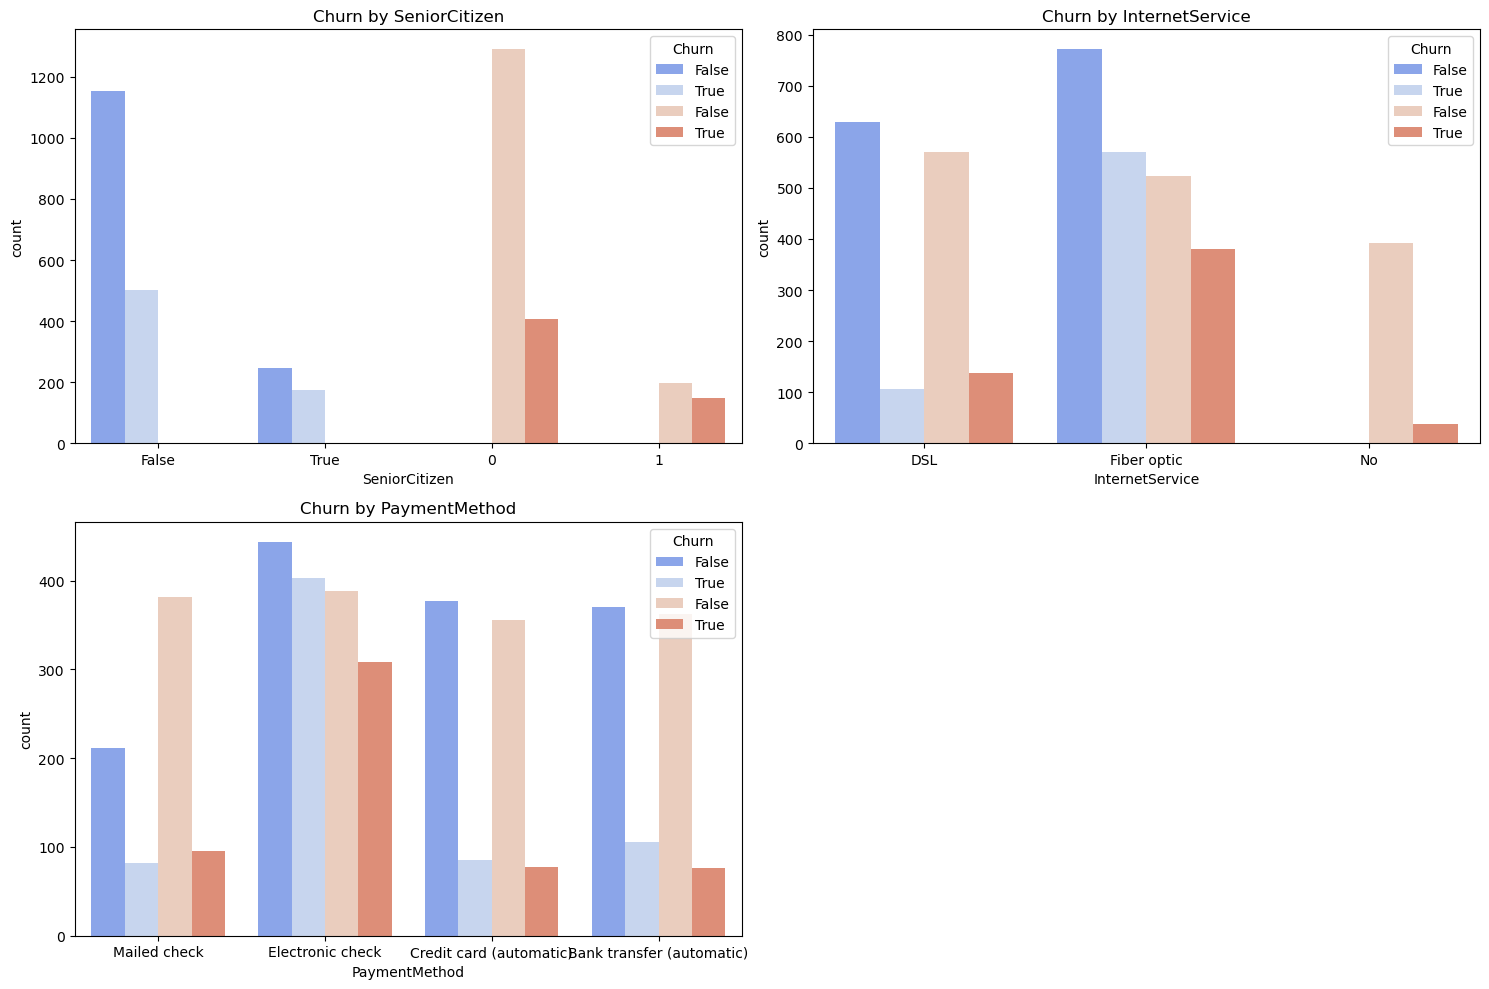

In [28]:
# Compare churn rates across different customer segments
customer_segments = ['SeniorCitizen', 'InternetService', 'PaymentMethod']
plt.figure(figsize=(15, 10))
for i, col in enumerate(customer_segments, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=col, hue='Churn', palette='coolwarm')
    plt.title(f"Churn by {col}")
plt.tight_layout()
plt.show()

### <font color="Blue"><b> Conclusion: Customer Segments with High Churn Rates
- **Senior Citizens:** Show higher churn rates compared to non-seniors.
- **Internet Service:** Customers using **Fiber optic** services churn more frequently than DSL users.
- **Payment Method:** The **Electronic Check** payment method is associated with the highest churn.

## <font color="brown"><b> 4. Visualizations & Insights
- Create bar charts, histograms, and box plots for key variables.
- Generate correlation heatmaps for relationships between features.
- Present findings on factors influencing customer churn.

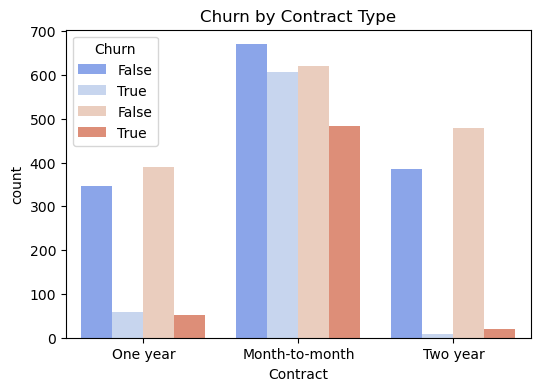

In [31]:
# Bar chart for churn by contract type
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=data, palette='coolwarm')
plt.title("Churn by Contract Type")
plt.show()

### <font color="Blue"><b> Conclusion
- **Churn by Contract Type:** Month-to-Month contracts show the highest churn, while One-Year and Two-Year contracts have much lower churn rates.

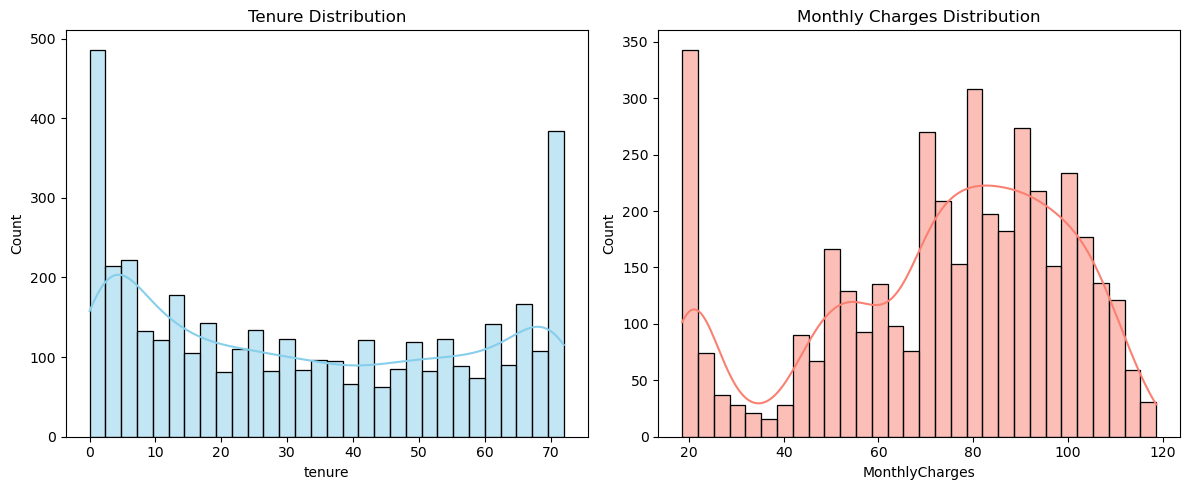

In [33]:
# Histogram for tenure and monthly charges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='tenure', bins=30, kde=True, color='skyblue')
plt.title("Tenure Distribution")

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='MonthlyCharges', bins=30, kde=True, color='salmon')
plt.title("Monthly Charges Distribution")
plt.tight_layout()
plt.show()

### <font color="Blue"><b> Conclusion  
- **Tenure Distribution:** Most customers either have very short tenures or have been with the company for a long period, indicating two distinct customer groups.  
- **Monthly Charges Distribution:** A larger number of customers are concentrated around mid-level monthly charges, with some paying exceptionally high rates.

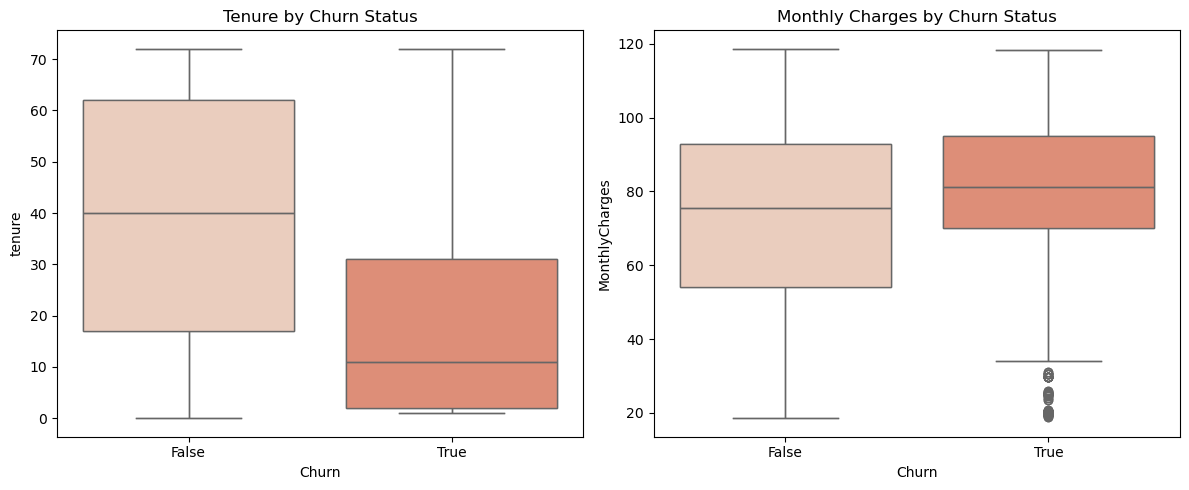

In [35]:
# Box plots for churn by tenure and monthly charges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=data, palette='coolwarm')
plt.title("Tenure by Churn Status")

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='coolwarm')
plt.title("Monthly Charges by Churn Status")
plt.tight_layout()
plt.show()

### <font color="Blue"><b> Conclusion  
- **Tenure by Churn Status:** Customers with shorter tenures are much more likely to churn.  
- **Monthly Charges by Churn Status:** Churned customers tend to have higher monthly charges compared to retained ones.

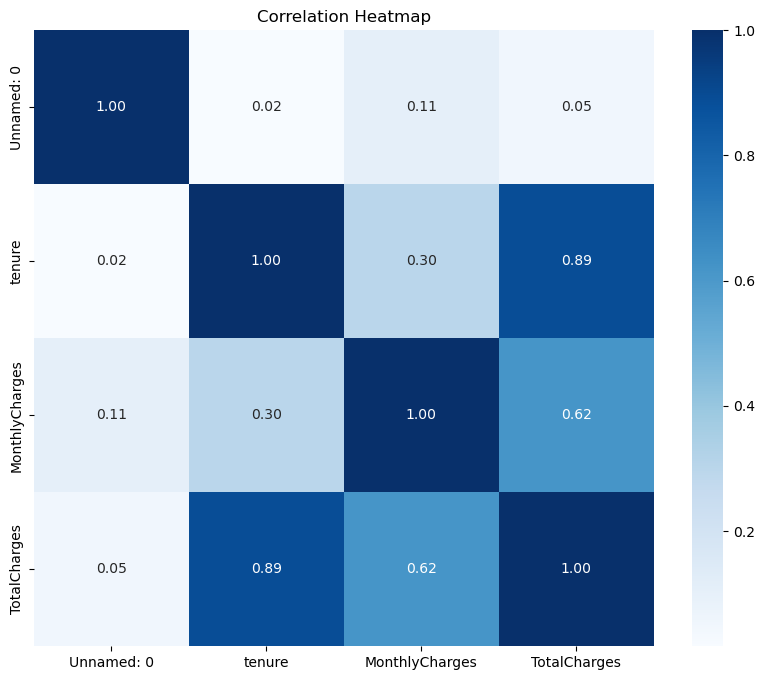

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### <font color="Blue"><b> Conclusion 
- **Tenure shows a strong negative correlation with churn** (-0.35), indicating that longer-tenured customers are less likely to churn.  
- **Monthly charges are positively correlated with churn** (0.20), meaning customers paying higher rates are more likely to leave.

## <font color="brown"><b> 5. Business Recommendations

#### <font color="Blue"><b> 1. Actionable Insights to Reduce Churn  
- **Target Month-to-Month Customers:** Customers on month-to-month contracts are more likely to churn. Offer attractive incentives like discounts or free upgrades to encourage them to switch to longer-term plans.  
- **Address High Monthly Charges:** Since churned customers tend to have higher monthly charges, introduce flexible and competitive pricing strategies to reduce churn risk.  
- **Enhance Support for High-Risk Segments:** Focus on senior citizens and customers using fiber optic internet, as these groups exhibit higher churn rates. Consider tailored customer service solutions or loyalty programs.  
- **Proactive Engagement:** Identify customers with short tenures and high monthly charges as high-risk groups. Engage them through surveys, personalized recommendations, and exclusive promotions.  

#### <font color="Blue"><b>2. Pricing Strategies  
- **Introduce Tiered Pricing Models:** Design affordable pricing tiers to cater to different customer segments based on usage and needs.  
- **Loyalty Discounts:** Offer loyalty rewards, such as discounts for customers who renew contracts or have stayed longer than a year.  
- **Bundling Services:** Provide bundled packages for phone, internet, and other services at discounted rates to increase customer satisfaction and reduce churn.

#### <font color="Blue"><b> 3. Customer Retention Approaches  
- **Flexible Payment Methods:** Reduce churn by expanding payment options beyond electronic checks and offering autopay incentives.  
- **Customer Onboarding Programs:** Provide onboarding assistance for new customers to ensure they fully understand and utilize the services.  
- **Predictive Analytics:** Use machine learning models to identify and target high-risk customers based on tenure, charges, and engagement history.  
- **Personalized Marketing:** Send targeted offers and communications based on customer behavior and preferences.